In [132]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
wordNet=WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer,PorterStemmer
ps=PorterStemmer()

In [150]:
def remove_stopwords(st,sw):
    output=[ps.stem(w) for w in st if not w in sw]
    return output

In [134]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=["label","message"])
messages
#sep='\t' as columns are tab seperated as y and x 

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [151]:
#data preprocessing and cleaning
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer
re=RegexpTokenizer('[a-zA-Z]+')

In [152]:
def customTokenizer(corpus):
    words=re.tokenize(corpus.lower())
    words=remove_stopwords(words,sw)
    return words

In [153]:
x=messages['message']
y=pd.get_dummies(messages['label'])
# to make spam as 1 and ham as 0
# can also use label encoding
y=y.iloc[:,1].values#spam
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [155]:
#bag of words 
from sklearn.feature_extraction.text import CountVectorizer
corpus=messages['message']
#instead of using customer tokenizer we can also use for loop for each document in corpus and append
#sentences or documents with stopwords and lemmataization document by document to form new corpus
cv=CountVectorizer(tokenizer=customTokenizer)
x_train=cv.fit_transform(x_train).toarray()
x_test=cv.transform(x_test).toarray()
print(x_train.shape)#(4457,5659)
#5659 words in vocab
print(len(cv.vocabulary_))
#cv.vocabulary_
#so instead of 5659 words lets take top 2500  most frequent words with max_features

(4457, 5659)
5659


In [157]:
#Training model using Navive Bayes
from sklearn.naive_bayes import MultinomialNB
spam_model=MultinomialNB().fit(x_train,y_train)
y_pred=spam_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_m=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9883408071748879

In [166]:
#lets test out max features effect on accuracy
x=messages['message']
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
ans=[]
maxx=0
for i in range(2000,5659,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    cv=CountVectorizer(max_features=i,tokenizer=customTokenizer)
    x_train=cv.fit_transform(x_train).toarray()
    x_test=cv.transform(x_test).toarray()
    spam_model=MultinomialNB().fit(x_train,y_train)
    y_pred=spam_model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    ans.append(accuracy)
    if accuracy>maxx:
        maxx=accuracy
        z=i

0.9901345291479821 3300


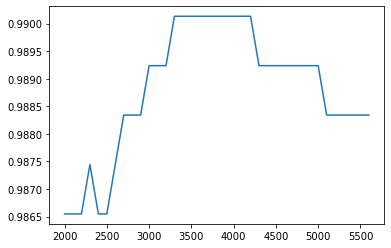

In [167]:
print(maxx,z)
r=np.arange(2000,5659,100)
import matplotlib.pyplot as plt
plt.plot(r,ans)